For this project, I decided to study a Titanic passengers data set (available at https://www.kaggle.com/c/titanic/data). I wanted to investigate what factors made a given passenger more or less likely to have been a survivor of the sinking of the Titanic. Specifically, I wanted to focus on the factors included in the data set (e.g. age, how many siblings/spouse were onboard, sex, etc.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

%matplotlib inline

df = pd.read_csv('titanic.csv')

First, and very importantly, we will make use of the "Survived" data column to divide the data according to whether a given passenger survived or not.

In [89]:
survivedGrouped = df.groupby('Survived')
survivors = survivorsGrouped.get_group(1)
deceased = survivorsGrouped.get_group(0)

,Passenger_ID,Survived,Ticket_Class,Name,Sex,Age,Siblings/Spouses,Parents/Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


To get a basic understanding of survivorship, let's investigate the numbers of passengers who survived or did not and their percentages.

In [90]:
survivedN = len(survivors)
deceasedN = len(deceased)
passengersN = len(df)
survivedPercent = 100*(survivedN/passengersN)
deceasedPercent = 100*(deceasedN/passengersN)


print "Number of passengers in data set: " + str(passengersN)
print "Number of survivors in data set: " + str(survivedN) + " (" + str(survivedPercent) + "%)"
print "Numbers of deceased in data set: " + str(deceasedN) + " (" + str(deceasedPercent) + "%)"


Number of passengers in data set: 891
Number of survivors in data set: 342 (38.3838383838%)
Numbers of deceased in data set: 549 (61.6161616162%)


As an initial study into what factors played a role in determining a passenger's survivorship, let us investigate if children were more or less likely to survive. For this, we will define anyone under 18 years of age as a child and anyone else as an adult. We can form these divisions of passengers in a similar way as above. 

In [143]:
children = df[df['Age'] < 18]
adults = df[df['Age'] >= 18]

agelessN = len(df) - len(children) - len(adults)
print agelessN

177


Before we continue, it should be noted that not every row of the dataframe is included in "children" and "adults". This is because some rows are missing an Age value. However, these rows cannot be used for our analysis of the factor of age anyway, so will continue our analysis with them intentionally left out. 

The precise number of such passengers is calculated above to be 177.

Now, let us make use of the merge function to combine the survivors/deceased dataframes with the children/adults dataframes to form new dataframes of their combinations. Then we will print the lengths of these dataframes and what percentages of the population they correspond to. 

In [131]:
print "Number of children: " + str(len(children))
print "Number of adults: " + str(len(adults))

childrenSurvivors = children.merge(survivors, on='Passenger_ID', how='inner')
childrenDeceased = children.merge(deceased, on='Passenger_ID', how='inner')
adultSurvivors = adults.merge(survivors, on='Passenger_ID', how='inner')
adultDeceased = adults.merge(deceased, on='Passenger_ID', how='inner')

print "Number of children who survived: " + str(len(childrenSurvivors)) + " (" + str(100*(len(childrenSurvivors)/len(children))) + "%)"
print "Number of children who died: " + str(len(childrenDeceased)) + " (" + str(100*(len(childrenDeceased)/len(children))) + "%)"
print "Number of adults who survived: " + str(len(adultSurvivors)) + " (" + str(100*(len(adultSurvivors)/len(adults))) + "%)"
print "Number of adults who died: " + str(len(adultDeceased)) + " (" + str(100*(len(adultDeceased)/len(adults))) + "%)"

Number of children: 113
Number of adults: 601
Number of children who survived: 61 (53.982300885%)
Number of children who died: 52 (46.017699115%)
Number of adults who survived: 229 (38.1031613977%)
Number of adults who died: 372 (61.8968386023%)


To better communciate what this data indicates about child vs. adult survivorship, we can graph it using a bar graph.

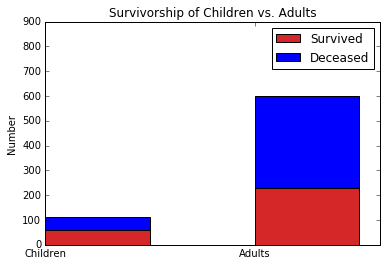

In [133]:
N = 2
survivorNumbers = (len(childrenSurvivors), len(adultSurvivors))
deceasedNumbers = (len(childrenDeceased), len(adultDeceased))
ind = np.arange(N)
width = 0.5

p1 = plt.bar(ind, survivorNumbers, width, color='#d62728')
p2 = plt.bar(ind, deceasedNumbers, width, bottom=survivorNumbers)

plt.ylabel('Number')
plt.title('Survivorship of Children vs. Adults')
plt.xticks(ind, ('Children', 'Adults'))
plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'Deceased'), loc='best')

plt.show()

As can be seen in the above bar graph, the proportion of adults who died is higher than the proportion of children who died. This gives us one factor to consider when predicting whether a given passenger survived based on their age. 

In a similar fashion as above, we will now divide the data according to the sex of passengers and view some basic information about sex and survivorship. 

In [134]:
sexGrouped = df.groupby('Sex')
males = sexGrouped.get_group('male')
females = sexGrouped.get_group('female')

maleSurvivors = males.merge(survivors, on='Passenger_ID', how='inner')
maleDeceased = males.merge(deceased, on='Passenger_ID', how='inner')
femaleSurvivors = females.merge(survivors, on='Passenger_ID', how='inner')
femaleDeceased = females.merge(deceased, on='Passenger_ID', how='inner')

print "Number of men who survived: " + str(len(maleSurvivors)) + " (" + str(100*(len(maleSurvivors)/len(males))) + "%)"
print "Number of men who died: " + str(len(maleDeceased)) + " (" + str(100*(len(maleDeceased)/len(males))) + "%)"
print "Number of women who survived: " + str(len(femaleSurvivors)) + " (" + str(100*(len(femaleSurvivors)/len(females))) + "%)"
print "Number of women who died: " + str(len(femaleDeceased)) + " (" + str(100*(len(femaleDeceased)/len(females))) + "%)"

Number of men who survived: 109 (18.8908145581%)
Number of men who died: 468 (81.1091854419%)
Number of women who survived: 233 (74.2038216561%)
Number of women who died: 81 (25.7961783439%)


In order to visualize our data and better see any findings, we will now graph the data with a bar graph.

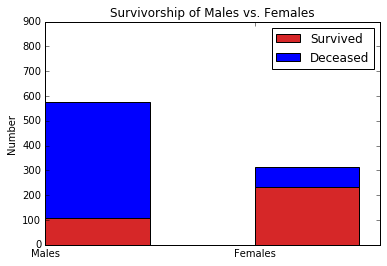

In [29]:
N = 2
survivorNumbers = (len(maleSurvivors), len(femaleSurvivors))
deceasedNumbers = (len(maleDeceased), len(femaleDeceased))
ind = np.arange(N)
width = 0.5

p1 = plt.bar(ind, survivorNumbers, width, color='#d62728')
p2 = plt.bar(ind, deceasedNumbers, width, bottom=survivorNumbers)

plt.ylabel('Number')
plt.title('Survivorship of Males vs. Females')
plt.xticks(ind, ('Males', 'Females'))
plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'Deceased'), loc='best')

plt.show()

The proportion of males who perished is clearly much more severe than the proportion of females. In fact, the difference is so severe that the proportions seem to be inversions of each other: 18.9% of males survived vs 74.2% of females survived. 

However, to be certain of our identification of the biases of children vs. adults and females vs. males, let us make use of the merge function to create subpopulations of the different combinations of sex and age (e.g. female children, male adults, etc.)

In [53]:
femaleChildrenSurvivors = femaleSurvivors.merge(childrenSurvivors, on='Passenger_ID', how='inner')
femaleChildrenDeceased = femaleDeceased.merge(childrenDeceased, on='Passenger_ID', how='inner')
femaleAdultSurvivors = femaleSurvivors.merge(adultSurvivors, on='Passenger_ID', how='inner')
femaleAdultDeceased = femaleDeceased.merge(adultDeceased, on='Passenger_ID', how='inner')
maleChildrenSurvivors = maleSurvivors.merge(childrenSurvivors, on='Passenger_ID', how='inner')
maleChildrenDeceased = maleDeceased.merge(childrenDeceased, on='Passenger_ID', how='inner')
maleAdultSurvivors = maleSurvivors.merge(adultSurvivors, on='Passenger_ID', how='inner')
maleAdultDeceased = maleDeceased.merge(adultDeceased, on='Passenger_ID', how='inner')

Now we will graph these subpopulations against each other to visually examine their relative survivorships.

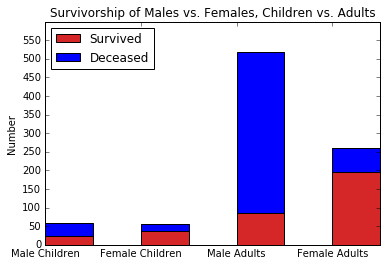

In [54]:
N = 4
survivorNumbers = (len(maleChildrenSurvivors), len(femaleChildrenSurvivors), len(maleAdultSurvivors), len(femaleAdultSurvivors))
deceasedNumbers = (len(maleChildrenDeceased), len(femaleChildrenDeceased), len(maleAdultDeceased), len(femaleAdultDeceased))
ind = np.arange(N)
width = 0.5

p1 = plt.bar(ind, survivorNumbers, width, color='#d62728')
p2 = plt.bar(ind, deceasedNumbers, width, bottom=survivorNumbers)

plt.ylabel('Number')
plt.title('Survivorship of Males vs. Females, Children vs. Adults')
plt.xticks(ind, ('Male Children', 'Female Children', 'Male Adults', 'Female Adults'))
plt.yticks(np.arange(0, 600, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Deceased'), loc='best')

plt.show()

As before, we notice a stark difference in male vs. female survivorship within the subpopulation of adults. However, this difference, while still apparent, is much less severe in the subpopulation of children. 

Now, before continuing our investigation into uninvestigated factors, it should be noted that of the given factors in the data set, one particular factor is quanititative rather than qualitative (i.e. involves numbers rather than classes). This factor is "Fare" (how much money a passenger paid for his/her ticket).
Since it is quantitative, this particular factor can be investigated quite easily using the describe() method.

In [44]:
fares = df.Fare
survivorFares = survivors.Fare
deceasedFares = deceased.Fare

print "Fare Statistics"
print fares.describe()
print ""
print "Survivor Fare Statistics"
print survivorFares.describe()
print ""
print "Deceased Fare Statistics"
print deceasedFares.describe()

Fare Statistics
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Survivor Fare Statistics
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

Deceased Fare Statistics
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


From these statistics, we can see quite clearly that the survivor division had a higher mean in fare than both the deceased division and the total data set. Moreover, the same is true for Q1, Q2, and Q3. From this we can establish a solid correlation between paying more one's fare and a higher likelihood of survival. 

As for the remaining factors yet to be investigated, they are all qualititative (i.e. they involve classes/groups to fall into rather than numbers). To investigate these factors, we can define a function (and a helper function) to organize these data. 

In [211]:
#Group data into total, survivor, and deceased divisions
def sortData(total, survivor, deceased):
    return pd.DataFrame({'Total': total, 'Survivors': survivor, 'Deceased': deceased}, columns=['Total', 'Survivors', 'Deceased'])

def organize(classifier):
    totalGrouped = df.groupby(classifier).count()
    totalData = totalGrouped.Passenger_ID.astype(pd.Series)
    
    survivorGrouped = survivors.groupby(classifier).count()
    survivorData = survivorGrouped.Passenger_ID.astype(pd.Series)
    
    deceasedGrouped = deceased.groupby(classifier).count()
    deceasedData = deceasedGrouped.Passenger_ID.astype(pd.Series)

    data = sortData(totalData, survivorData, deceasedData)
    
    nanCorrectedResult = data.fillna(value=0)
    
    return nanCorrectedResult

Now let us apply the organize() function to our remaining data factors and print their results. 

In [213]:
embarkedData = organize('Embarked')
ticketClassData = organize('Ticket_Class')
sibSpoData = organize('Siblings/Spouses')
parChiData = organize('Parents/Children')

print "Embarked Data"
print embarkedData
print ""
print "Ticket Class Data"
print ticketClassData
print ""
print "Siblings/Spouse Data"
print sibSpoData
print ""
print "Parents/Children Data"
print parChiData

Embarked Data
          Total  Survivors  Deceased
Embarked                            
C           168         93        75
Q            77         30        47
S           644        217       427

Ticket Class Data
              Total  Survivors  Deceased
Ticket_Class                            
1               216        136        80
2               184         87        97
3               491        119       372

Siblings/Spouse Data
                  Total  Survivors  Deceased
Siblings/Spouses                            
0                   608        210       398
1                   209        112        97
2                    28         13        15
3                    16          4        12
4                    18          3        15
5                     5          0         5
8                     7          0         7

Parents/Children Data
                  Total  Survivors  Deceased
Parents/Children                            
0                   678        233   

It worked!
This is fine, but it would be nice to be able to visualize the data. We can do this very easily with the plot() method. Let us apply this to the organized data.

Not the spikes in deceased for cabins A and C

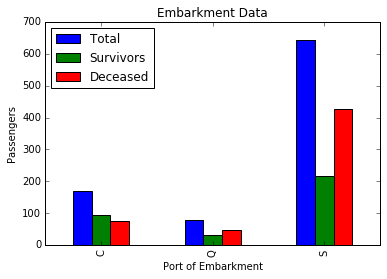

In [157]:
ax = embarkedData.plot(kind = 'bar', title = 'Embarkment Data')
ax.set_xlabel("Port of Embarkment")
ax.set_ylabel("Passengers")

Note the higher proportion of deceased for Embarked class S

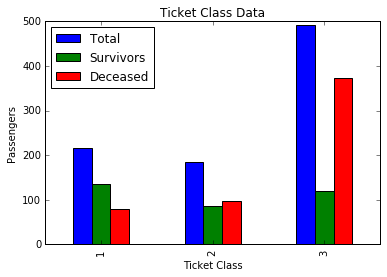

In [156]:
ax = ticketClassData.plot(kind = 'bar', title = 'Ticket Class Data')
ax.set_xlabel("Ticket Class")
ax.set_ylabel("Passengers")

Note the general increase in proportion of deceased with increase in ticket class, and the huge spike in proportion of deceased for ticket class 3

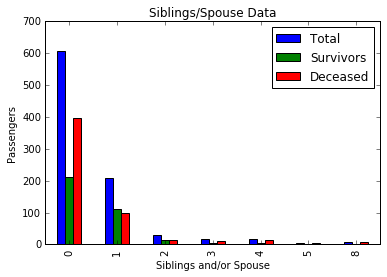

In [155]:
ax = sibSpoData.plot(kind = 'bar', title = 'Siblings/Spouse Data')
ax.set_xlabel("Siblings and/or Spouse")
ax.set_ylabel("Passengers")

Note that the proportion of deceased is roughly twice the proportion of survivors for those passengers with 0 siblings/spouse onboard, while the proportion of deceased is roughly the same as the proportion of survivors for every other number of siblings/spouse.

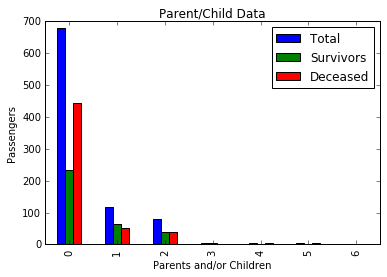

In [154]:
ax = parChiData.plot(kind = 'bar', title = 'Parents/Children Data')
ax.set_xlabel("Parents and/or Children")
ax.set_ylabel("Passengers")

Note that the proportion of deceased is roughly twice the proportion of survivors for those passengers with 0 parents/children onboard, while the proportion of deceased is roughly the same as the proportion of survivors for every other number of parents/children.

As a this point, from our investigation into several factors we can conclude that:
1. Children are more likely to be survivors than adults
2. Females are more likely to be survivors than males
3. Females adults are severly more likely to be survivors than male adults
4. Passengers who paid more for their ticket are more likely to be survivors
5. Passengers who embarked from site S (Southampton) are less likely to be survivors than those who embarked at sites Q and C (Queenstown and Cherbourg, respectively)
6. Passengers with higher numerical ticket class were less likely to be survivors
7. Passengers with ticket class 3 were severely less likely to be survivors
8. Passengers with no significant other(s) (i.e. sibling, spouse, parent, child) onboard were less likely to be survivors

Lastly, it is necessary to point out some possible sources of doubt about the validity of our data:
1. Only 891 of the 2224 total passengers onboard the Titanic are represented in this data set, and the patterns we see in the given data set may not be present in the total population of our concern.
2. There are 177 passengers for whom an age is not given. We do not know if there is some hidden factor affecting the rate of survivorship that also affects the frequency of age not being recorded. 
3. There are only 204 passengers in this data set for whom a cabin is assigned. This represents only a fraction of the data set (as well as the population), and we don't know the true distribution of cabin assignments, so any analysis of this factor should be taken with some doubt in mind. 